In [1]:
import numpy
import scipy
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
S = 5

In [3]:
L = 500 * S
B = 30 * S
mu = 3 * (S+1)
sigma = S+1
min_i = 3 * (S+1)

[555, 365, 285, 530, 670, 1325, 1475, 445, 355, 595, 260, 315, 1060, 530, 145, 1085, 860, 420, 655]


(array([0.00079145, 0.0015829 , 0.0015829 , 0.0015829 , 0.        ,
        0.00039573, 0.00039573, 0.00039573, 0.00039573, 0.00039573]),
 array([ 145.,  278.,  411.,  544.,  677.,  810.,  943., 1076., 1209.,
        1342., 1475.]),
 <a list of 10 Patch objects>)

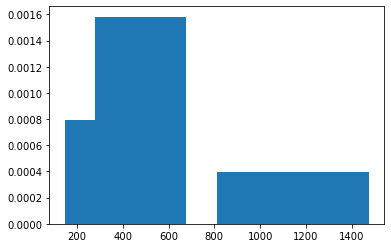

In [4]:
Q_years = [111 , 73, 57, 106, 134, 265, 295, 89, 71, 119, 52, 63, 212, 106, 29, 217, 172, 84, 131]
Q_years = list(map(lambda x: x*S, Q_years))
print(Q_years)
plt.hist(Q_years,  density=True)

((array([ 184.01873462,  240.64679119,  283.42916585,  321.00787499,
          356.31006572,  390.7716898 ,  425.3077758 ,  460.63077041,
          497.39562608,  536.29139552,  578.1240265 ,  623.91875261,
          675.07647418,  733.64806269,  802.87426721,  888.39362501,
         1001.45752688, 1170.21127309, 1503.63663214]),
  array([ 145,  260,  285,  315,  355,  365,  420,  445,  530,  530,  555,
          595,  655,  670,  860, 1060, 1085, 1325, 1475])),
 (1.0760778698059155, -33.222050345361595, 0.9881264938260134))

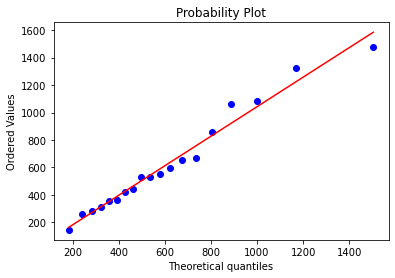

In [5]:
shape, loc, scale = scipy.stats.lognorm.fit(Q_years)
scipy.stats.probplot(Q_years, dist=scipy.stats.lognorm(shape,loc,scale),  plot=plt.figure().add_subplot(111))

In [6]:
def Z_count(Q, L, B, K, Z_m, Z_v):
    return (Q/(K*B*numpy.sqrt((Z_m-Z_v)/L)))**(3/5)

In [7]:
Q=scipy.stats.lognorm.median(shape,loc,scale)
Q

536.291395515723

In [8]:
s = numpy.random.triangular(54,55,56, 1000)
Z_m = numpy.median(s)
Z_m

54.97923085826889

In [16]:
s = numpy.random.triangular(49,50,51, 1000)
Z_v = numpy.median(s)
Z_v

49.99029621169086

In [10]:
s = list()
for i in range(1000):
    s.append(max(min_i, numpy.random.normal(mu, sigma)))
K = numpy.median(s)
K

18.0

In [11]:
Z_count(Q, L,B, K, Z_m, Z_v)

2.4488779607019517

(array([7.700e+01, 5.680e+02, 1.381e+03, 1.873e+03, 1.891e+03, 1.472e+03,
        1.029e+03, 6.830e+02, 4.210e+02, 2.510e+02, 1.460e+02, 9.200e+01,
        4.700e+01, 2.800e+01, 1.500e+01, 1.000e+01, 8.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 0.55868602,  0.93826703,  1.31784805,  1.69742906,  2.07701007,
         2.45659109,  2.8361721 ,  3.21575311,  3.59533413,  3.97491514,
         4.35449615,  4.73407716,  5.11365818,  5.49323919,  5.8728202 ,
         6.25240122,  6.63198223,  7.01156324,  7.39114426,  7.77072527,
         8.15030628,  8.5298873 ,  8.90946831,  9.28904932,  9.66863034,
        10.04821135]),
 <a list of 25 Patch objects>)

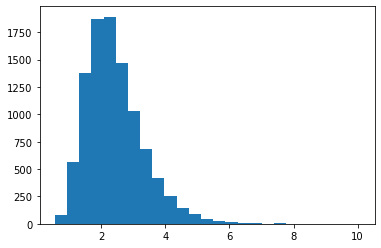

In [12]:
N = 10000
res = list()
for i in range(N):
    Q = scipy.stats.lognorm.rvs(shape,loc,scale)
    Z_v = numpy.random.triangular(49,50,51)
    Z_m = numpy.random.triangular(54,55,56)
    K = max(min_i, numpy.random.normal(mu, sigma))
    res.append(Z_count(Q, L,B, K, Z_m, Z_v))
plt.hist(res, bins=25)

In [13]:
numpy.percentile(res, 99)

5.304099882130587

Висновок: Отже, нам варто будувати дамбу вище ніж значення зверху(приблизно в діапазоні 5.3 метрів(дивитись значення, яке вийшло зверху)), щоб ми були в безпеці і нас не затоплювало.